# Herman Franclin Tesso Tassang

## Header
The notebook is divided into three sections, with each section containing its own report..

**References**:

*Lecture notes

*paper on [Visualizing and Understanding Convolutional Networks](https://arxiv.org/abs/1311.2901.)

*Srijana Raut [Github account](https://github.com/rautsrijana/Transfer_learning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#@title set working directory
import os

# Set the path
drive_path = '/content/drive/MyDrive/Shortcut to courses materials/practical_computer_vision'

# Change the current working directory
os.chdir(drive_path)

# Verify the change
print("Current Working Directory: ", os.getcwd())

Current Working Directory:  /content/drive/MyDrive/Shortcut to courses materials/practical_computer_vision


In [1]:
# dependencies

import numpy as np
import  matplotlib.pyplot as plt
import time
import pickle


from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPool2D, Conv2D,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam

from keras.losses import CategoricalCrossentropy

from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping  # Import EarlyStopping callback

from keras.datasets import cifar10

from tensorflow.keras.utils import to_categorical


from tensorflow.keras.layers import GlobalAveragePooling2D,UpSampling2D,Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50


import cv2
# metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Training basic CNNs from scratch

For the classification task on the Cifar10 dataset, I implemented three different CNN architectures, each with different regularization strategies and values of hyperparameters for training. Before building the models, I prepared the data by performing necessary preprocessing such as one-hot encoding and data normalization (scaling the pixel values between 0 and 1).

For each model, the "ReLU" activation function was used throughout the training, except for the output layer. 20% of the training data was used as a validation set, and the "Early Stopping" technique was used along with other regularization techniques to prevent overfitting.

After training, both the training history and a classification report on the test set were provided for each model, allowing us to evaluate the model performance based on specific metrics such as accuracy and precision.

Below is a summary of the regularization techniques and hyperparameter values used in each model:

**Model 1**:
- Three Conv layers, each followed by a pooling operation, and two fully connected layers in addition to the output layer.
- L2 regularization with a parameter value of 0.001 applied in each Conv layer.
- Each Dense layer is followed by the Dropout operation, with dropout rates of 0.5 and 0.2 respectively.
- The fitting procedure is performed with a batch size of 32, learning rate of 0.001, and 30 iterations.

**Model 2**:
- Based on the architecture of Model 1, an additional Conv layer is added.
- The number of epochs is increased to 50.

**Model 3**:
- Based on the architecture of Model 2, L2 regularization is applied only to the Dense layers.
- Batch normalization technique is added.
- The number of activation units in the Dense layer is halved.

  ## Observations:

| Model    | Accuracy  | training time (s)  |
|--------------|--------------|--------------|
| Model 1 | 0.48 | 203.50|
| Model 2 | 0.70  | 1824.76 |
| Model 3 | 0.6 | 1336.10 |

 **Model 2** outperforms the other two models in terms of accuracy on the test set.  **Model 1 ** achieves a very low accuracy compared to  **Model 3**. Several trials with different values of hyperparameters have been conducted for each architecture, and it has been observed that the model is highly sensitive to the learning rate and the L2-regularization parameter. Furthermore, increasing the number of Conv layers without careful consideration significantly prolongs training time and tends to result in a subpar model.

##Discussion:

My approach involved gradually modifying the architecture of the initial model in order to achieve an effective model. However, starting from **Model 2**, all the modifications I attempted led to less reliable models. I am confident that a combination of regularization techniques and well-tuned hyperparameters can significantly improve accuracy on the test set.




In [4]:
#@title load the data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

print('Training data shape:',X_train.shape)
print('')

np.unique(Y_train,return_counts=True)

170498071/170498071 [==============================] - 2s 0us/step
Training data shape: (50000, 32, 32, 3)



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [5]:
#@title preprocessing

def rescale_images(images):
    """
    Rescale pixel values of images to the range [0, 1].

    Args:
    - images: numpy array of images with shape (num_samples, height, width, channels)

    Returns:
    - rescaled_images: numpy array of rescaled images with shape (num_samples, height, width, channels)
    """
    return images.astype(np.float32) / 255.0

X_train=rescale_images(X_train)
X_test=rescale_images(X_test)

# encode the labels
y_train=to_categorical(Y_train,num_classes=10)

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#@title Model 1
INPUT_SHAPE =(X_train.shape[1],X_train.shape[2],3)

model = keras.Sequential()

# 1st conv layer
model.add(Conv2D(filters = 16, kernel_size =2, input_shape = INPUT_SHAPE, strides=1, padding='same',activation = 'relu', kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.MaxPool2D(pool_size =(2,2)))

# 2nd conv layer
model.add(keras.layers.Conv2D(filters = 32, kernel_size =2, strides=1, padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))



# 3rd conv layer
model.add(keras.layers.Conv2D(filters =64, kernel_size = 3 ,strides=1, padding='same' ,activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.MaxPool2D(pool_size=(3,3)))



# flatten the ouput and feed it into dense layer
model.add(Flatten())

# create 20 fully connected units
model.add(Dense(units= 128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
# The output layers
model.add(Dense(10, activation = 'softmax'))

# Here we tell the model how to improve/update the weights
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

# model architecture
# model.summary()


In [ ]:
#@title training
# Record the start time
start_time = time.time()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Stop training if validation loss doesn't improve for 5 epochs

# Train the model
history=model.fit(X_train,y_train,batch_size=32,epochs=30,validation_split=0.2,callbacks=[early_stopping],verbose=0)     # Pass early stopping callback to the fit method

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

Training time: 203.50 seconds


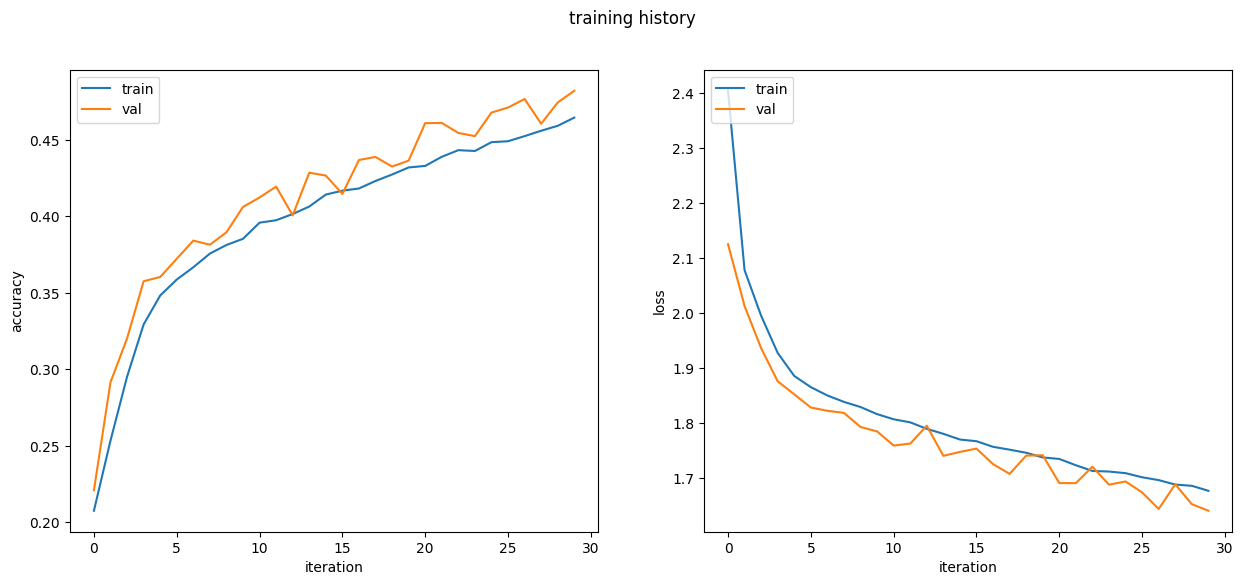

313/313 [==============================] - 1s 2ms/step

Accuracy: 0.48

Classification report:

              precision    recall  f1-score   support

     Class 0       0.45      0.53      0.48      1000
     Class 1       0.66      0.56      0.61      1000
     Class 2       0.30      0.33      0.31      1000
     Class 3       0.32      0.18      0.23      1000
     Class 4       0.47      0.33      0.39      1000
     Class 5       0.40      0.54      0.46      1000
     Class 6       0.63      0.51      0.56      1000
     Class 7       0.59      0.53      0.56      1000
     Class 8       0.52      0.71      0.60      1000
     Class 9       0.52      0.61      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000



In [ ]:
#@title Trainning history and classification report on the test set
fig=plt.figure(figsize=(15,6))
fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.legend(['train', 'val'], loc='upper left')

fig.add_subplot(1, 2, 2)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('training history')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train', 'val'], loc='upper left')

plt.suptitle('training history')
plt.show()

###########################"#######"

#title make predictions
predictions = model.predict(X_test)
Y_pred=np.argmax(predictions,axis=1)[:,np.newaxis]

###################################

print('')

# Compute the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('')

# Compute the classification report
report = classification_report(Y_test, Y_pred, target_names=[f'Class {i}' for i in range(10)])
print('Classification report:\n')
print( report)


In [ ]:
#@title Model 2
INPUT_SHAPE =(X_train.shape[1],X_train.shape[2],3)

model = keras.Sequential()

# 1st conv layer
model.add(Conv2D(filters = 16, kernel_size =2, input_shape = INPUT_SHAPE, strides=1, padding='same',activation = 'relu', kernel_initializer='glorot_normal',kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.MaxPool2D(pool_size =(2,2)))

# 2nd conv layer
model.add(keras.layers.Conv2D(filters = 32, kernel_size =2, strides=1, padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))



# 3nd conv layer
model.add(keras.layers.Conv2D(filters = 32, kernel_size =2, strides=1, padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

# 4 conv layer
model.add(keras.layers.Conv2D(filters =64, kernel_size =2,strides=1, padding='same' ,activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.MaxPool2D(pool_size=(3,3)))



# flatten the ouput and feed it into dense layer
model.add(Flatten())

# create 20 fully connected units
model.add(Dense(units= 128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
# The output layers
model.add(Dense(10, activation = 'softmax'))

# Here we tell the model how to improve/update the weights
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

# model architecture
# model.summary()

In [1]:
#@title training (Model 2)
# Record the start time
start_time = time.time()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Stop training if validation loss doesn't improve for 5 epochs

# Train the model
history=model.fit(X_train,y_train,batch_size=64,epochs=50,validation_split=0.2,callbacks=[early_stopping])     # Pass early stopping callback to the fit method

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time ))

Training time: 1824.76 seconds


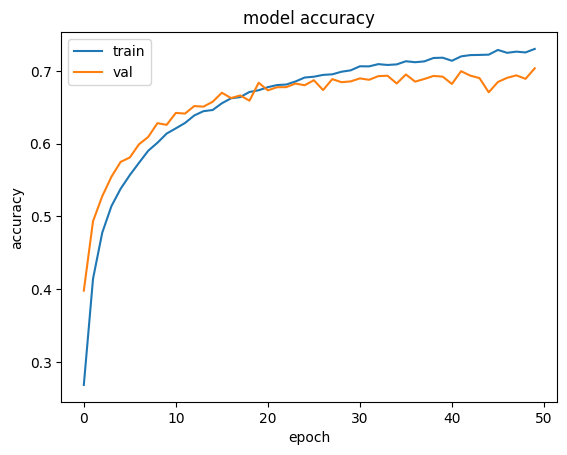

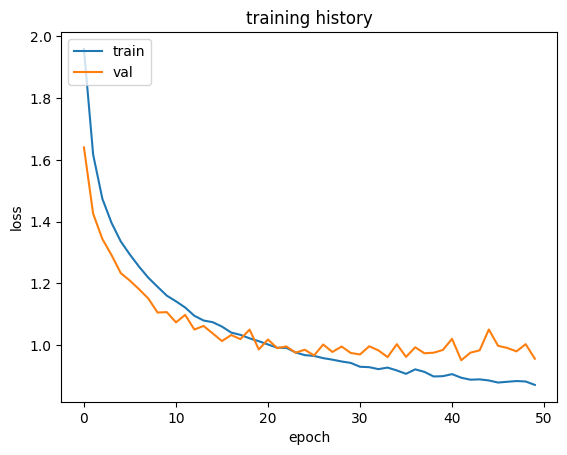

313/313 [==============================] - 3s 10ms/step

Accuracy: 0.70

Classification report:

              precision    recall  f1-score   support

     Class 0       0.70      0.78      0.73      1000
     Class 1       0.80      0.86      0.83      1000
     Class 2       0.56      0.65      0.60      1000
     Class 3       0.51      0.54      0.52      1000
     Class 4       0.65      0.64      0.65      1000
     Class 5       0.62      0.58      0.60      1000
     Class 6       0.81      0.72      0.76      1000
     Class 7       0.74      0.73      0.74      1000
     Class 8       0.86      0.75      0.80      1000
     Class 9       0.82      0.77      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [ ]:
#@title Trainning history & classification report (on the test set)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training history')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

###########################"#######"

#title make predictions

predictions = model.predict(X_test)
Y_pred=np.argmax(predictions,axis=1)[:,np.newaxis]

###################################

print('')

# Compute the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('')

# Compute the classification report
report = classification_report(Y_test, Y_pred, target_names=[f'Class {i}' for i in range(10)])
print('Classification report:\n')
print( report)


In [ ]:
#@title Model 3
# Assume X_train is already defined and loaded
IINPUT_SHAPE =(X_train.shape[1],X_train.shape[2],3)

model= keras.Sequential()

# 1st conv layer
model.add(Conv2D(filters = 16, kernel_size =2, input_shape = INPUT_SHAPE, strides=1, padding='same',activation = 'relu', kernel_initializer='glorot_normal'))
model.add(keras.layers.MaxPool2D(pool_size =(2,2)))
model.add(BatchNormalization())

# 2nd conv layer
model.add(keras.layers.Conv2D(filters = 32, kernel_size =2, strides=1, padding='same',activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size=(3,3)))
model.add(BatchNormalization())


# 3rd conv layer
model.add(keras.layers.Conv2D(filters =64, kernel_size =2,strides=1, padding='same' ,activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size=(3,3)))



# flatten the ouput and feed it into dense layer
model.add(Flatten())

# create 20 fully connected units
model.add(Dense(units= 64, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(units=32, activation='relu'))
#model.add(Dropout(0.3))
# The output layers
model.add(Dense(10, activation = 'softmax'))

# Here we tell the model how to improve/update the weights
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])


In [ ]:
#@title training (Model 3)
# Record the start time
start_time = time.time()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Stop training if validation loss doesn't improve for 5 epochs

# Train the model
history=model.fit(X_train,y_train,batch_size=32,epochs=50,validation_split=0.2,callbacks=[early_stopping],verbose=0)     # Pass early stopping callback to the fit method

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

Training time: 1336.10 seconds


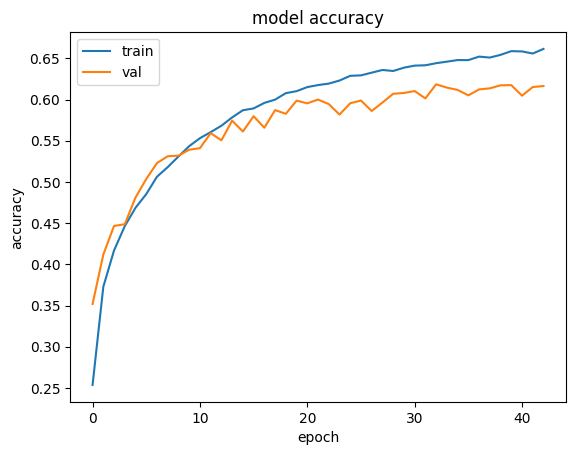

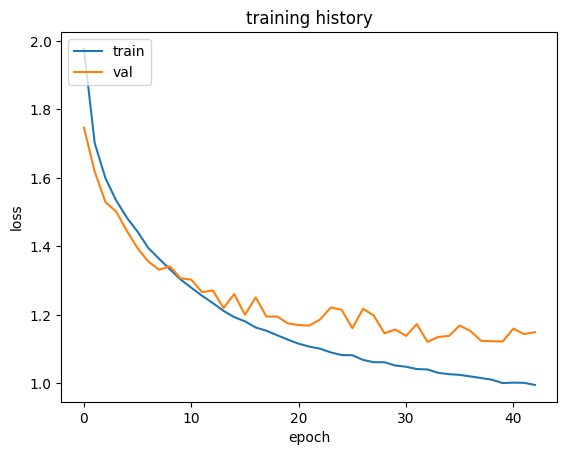

313/313 [==============================] - 3s 8ms/step

Accuracy: 0.60

Classification report:

              precision    recall  f1-score   support

     Class 0       0.65      0.58      0.61      1000
     Class 1       0.72      0.74      0.73      1000
     Class 2       0.48      0.53      0.50      1000
     Class 3       0.41      0.41      0.41      1000
     Class 4       0.62      0.48      0.54      1000
     Class 5       0.48      0.59      0.53      1000
     Class 6       0.57      0.81      0.67      1000
     Class 7       0.74      0.55      0.63      1000
     Class 8       0.73      0.69      0.71      1000
     Class 9       0.72      0.64      0.68      1000

    accuracy                           0.60     10000
   macro avg       0.61      0.60      0.60     10000
weighted avg       0.61      0.60      0.60     10000



In [ ]:
#@title Trainning history & classification report (on the test set)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training history')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

###########################"#######"

#title make predictions
predictions = model.predict(X_test)
Y_pred=np.argmax(predictions,axis=1)[:,np.newaxis]

###################################

print('')

# Compute the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('')

# Compute the classification report
report = classification_report(Y_test, Y_pred, target_names=[f'Class {i}' for i in range(10)])
print('Classification report:\n')
print( report)


#Classification with transfer learning

## Description  :

I selected ResNet50 as the pre-trained network for this task due to its proven performance on the ImageNet dataset. It achieved a top-1 accuracy of approximately 77% to 80.4% and a top-5 accuracy of around 93% to 94%.

I created three different architectures based on this model. To address the variation in image dimensions between ImageNet and CIFAR-10, I resized all the CIFAR-10 images to match the dimensions of the ImageNet images. This ensured that the resized images would align with the required input of ResNet50. The resizing operation was conducted using the **cv2.resize** module and was performed in a batch-wise manner to avoid memory issues (refer to the "generator(...)" function). The following are the configurations of the three architectures:

**1st transfer learning model**:
- I replaced the fully connected layers on top of ResNet50 with two Dense layers, in addition to the output layer.
- Each Dense layer was followed by the *Batch Normalization* technique and the *Dropout* operation.
- The weights of the pre-trained network were frozen.

**2nd transfer learning model**:
- Based on the first model, we removed one dense layer and increased the number of activation units in the remaining hidden dense layer.

**3rd transfer learning model**:
- I maintained the architecture of the first model, but I set the input size of ResNet50 to be equal to the original dimensions of the CIFAR-10 dataset.
## Observation


| Model    | Accuracy  | training time (s)  |
|--------------|--------------|--------------|
| 1st model  | 0.52 |  978.82 |
| 2nd model  | 0.61  | 1945.94 |
| 3rd model | 0.46| 324.43  |

As anticipated, the third model required less time for training but yielded a significantly poor accuracy on the test set. However, the performance results (accuracy) of the first two models are also not satisfactory. The best performance was achieved by the second model, with an accuracy of 0.61, which is considerably lower than the accuracy of our best model built from scratch (0.70). Additionally, this model took longer to train compared to the training time of the best model built from scratch. This result was surprising, as I expected better performance without exerting significant effort, considering that I am already utilizing pre-trained weights from a benchmark model.

##Discussion

In general, the transfer learning model we implemented required a longer runtime compared to the model built from scratch, especially when fine-tuning the weights of the pre-trained network. Furthermore, using a pre-trained model does not guarantee optimal performance, as we still need to carefully determine the appropriate structure for the additional layers on top of the base model in order to create a reliable model for our specific task. It is reasonable to expect that by utilizing the pre-trained model for this particular classification task, the accuracy of a well-designed architecture derived from the base model should significantly surpass what was achieved by the best model built from scratch (0.70).

In [3]:
#@title resizing function/ generator
def generator(images, labels, batch_size, target_size):
    num_samples = len(images)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    batch_start = 0
    while True:
        batch_indices = indices[batch_start:batch_start + batch_size]
        batch_images = images[batch_indices]
        resized_images = np.zeros((len(batch_images), *target_size, 3))
        for i, img in enumerate(batch_images):
            resized_images[i] = cv2.resize(img, (target_size[0], target_size[1]))
        yield resized_images, labels[batch_indices]
        batch_start += batch_size
        if batch_start >= num_samples:
            np.random.shuffle(indices)
            batch_start = 0

#####################################################################################

import math
# Define the prediction generator
def prediction_generator(images, batch_size, target_size):
    num_samples = len(images)
    for start in range(0, num_samples, batch_size):
        end = min(start + batch_size, num_samples)
        batch_images = images[start:end]
        resized_images = np.zeros((len(batch_images), *target_size, 3))
        for i, img in enumerate(batch_images):
            resized_images[i] = cv2.resize(img, (target_size[0], target_size[1]))
        yield resized_images


In [6]:
from sklearn.model_selection import train_test_split

X, X_val, y, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [17]:
batch_size = 32
target_size = (224, 224)

train_generator = generator(X, y, batch_size, target_size)
val_generator = generator(X_val, y_val, batch_size, target_size)

# Create prediction generator
predict_generator = prediction_generator(X_test, batch_size, target_size)


In [13]:
#@title First transfer learning model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(Flatten())
transfer_model.add(BatchNormalization()) #
transfer_model.add(Dense(500, activation='relu'))
transfer_model.add(Dropout(0.5))
transfer_model.add(BatchNormalization())#
transfer_model.add(Dense(64, activation='relu'))
transfer_model.add(Dropout(0.5))#
#transfer_model.add(BatchNormalization())
transfer_model.add(Dense(10, activation='softmax'))
transfer_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
#@title training
steps_per_epoch = len(X) // batch_size
validation_steps = len(X_val) // batch_size

# record the start time
start_time = time.time()

transfer_model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=5, validation_data=val_generator, validation_steps=validation_steps)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))


Epoch 1/5
1250/1250 [==============================] - 201s 157ms/step - loss: 1.9792 - accuracy: 0.3048 - val_loss: 1.5300 - val_accuracy: 0.4709
Epoch 2/5
1250/1250 [==============================] - 189s 151ms/step - loss: 1.6408 - accuracy: 0.4114 - val_loss: 1.3692 - val_accuracy: 0.5172
Epoch 3/5
1250/1250 [==============================] - 202s 161ms/step - loss: 1.5396 - accuracy: 0.4502 - val_loss: 1.3137 - val_accuracy: 0.5386
Epoch 4/5
1250/1250 [==============================] - 192s 153ms/step - loss: 1.5535 - accuracy: 0.4464 - val_loss: 1.3634 - val_accuracy: 0.5266
Epoch 5/5
1250/1250 [==============================] - 195s 156ms/step - loss: 1.5204 - accuracy: 0.4596 - val_loss: 1.3518 - val_accuracy: 0.5222
Training time: 978.82 seconds


In [18]:
#@title make predictions
#predictions = transfer_model.predict(X_test)

#
# Calculate steps for predictions
steps = math.ceil(len(X_test) / batch_size)

# Perform predictions
predictions = transfer_model.predict(predict_generator, steps=steps)
Y_pred=np.argmax(predictions,axis=1)[:,np.newaxis]


print('')

# Compute the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

print()

# Compute the classification report
report = classification_report(Y_test, Y_pred, target_names=[f'Class {i}' for i in range(10)])
print('Classification report:\n')
print( report)

313/313 [==============================] - 32s 100ms/step

Accuracy: 0.52

Classification report:

              precision    recall  f1-score   support

     Class 0       0.60      0.54      0.56      1000
     Class 1       0.60      0.71      0.65      1000
     Class 2       0.33      0.47      0.39      1000
     Class 3       0.30      0.20      0.24      1000
     Class 4       0.50      0.37      0.43      1000
     Class 5       0.53      0.39      0.45      1000
     Class 6       0.50      0.78      0.61      1000
     Class 7       0.61      0.59      0.60      1000
     Class 8       0.62      0.69      0.65      1000
     Class 9       0.67      0.49      0.57      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.52     10000
weighted avg       0.53      0.52      0.52     10000



In [9]:
#@title 2nd Transfer learning model

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(Flatten())
transfer_model.add(BatchNormalization()) #
transfer_model.add(Dense(500, activation='relu'))
transfer_model.add(Dropout(0.5))
transfer_model.add(BatchNormalization())#
#transfer_model.add(Dense(64, activation='relu'))
#transfer_model.add(Dropout(0.5))#
#transfer_model.add(BatchNormalization())
transfer_model.add(Dense(10, activation='softmax'))
transfer_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 0s 0us/step


In [10]:

#@title training
steps_per_epoch = len(X) // batch_size
validation_steps = len(X_val) // batch_size

# Record the start time
start_time = time.time()

transfer_model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=10, validation_data=val_generator, validation_steps=validation_steps)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))


Epoch 1/10
1250/1250 [==============================] - 208s 158ms/step - loss: 1.6850 - accuracy: 0.4184 - val_loss: 1.3169 - val_accuracy: 0.5284
Epoch 2/10
1250/1250 [==============================] - 191s 153ms/step - loss: 1.4021 - accuracy: 0.5042 - val_loss: 1.2458 - val_accuracy: 0.5590
Epoch 3/10
1250/1250 [==============================] - 191s 153ms/step - loss: 1.3728 - accuracy: 0.5116 - val_loss: 1.5335 - val_accuracy: 0.5189
Epoch 4/10
1250/1250 [==============================] - 191s 153ms/step - loss: 1.3737 - accuracy: 0.5087 - val_loss: 1.3290 - val_accuracy: 0.5470
Epoch 5/10
1250/1250 [==============================] - 197s 158ms/step - loss: 1.3177 - accuracy: 0.5325 - val_loss: 1.1599 - val_accuracy: 0.5920
Epoch 6/10
1250/1250 [==============================] - 188s 151ms/step - loss: 1.2589 - accuracy: 0.5522 - val_loss: 1.1493 - val_accuracy: 0.5931
Epoch 7/10
1250/1250 [==============================] - 186s 149ms/step - loss: 1.2261 - accuracy: 0.5643 - val_

In [11]:
#@title make predictions
#predictions = transfer_model.predict(X_test)

# Calculate steps for predictions
steps = math.ceil(len(X_test) / batch_size)

# Perform predictions
predictions = transfer_model.predict(predict_generator, steps=steps)
Y_pred=np.argmax(predictions,axis=1)[:,np.newaxis]


print('')

# Compute the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

print()

# Compute the classification report
report = classification_report(Y_test, Y_pred, target_names=[f'Class {i}' for i in range(10)])
print('Classification report:\n')
print( report)

313/313 [==============================] - 36s 109ms/step

Accuracy: 0.61

Classification report:

              precision    recall  f1-score   support

     Class 0       0.69      0.64      0.66      1000
     Class 1       0.69      0.76      0.72      1000
     Class 2       0.50      0.40      0.45      1000
     Class 3       0.41      0.39      0.40      1000
     Class 4       0.49      0.63      0.55      1000
     Class 5       0.53      0.47      0.50      1000
     Class 6       0.68      0.71      0.70      1000
     Class 7       0.69      0.68      0.68      1000
     Class 8       0.68      0.78      0.73      1000
     Class 9       0.72      0.66      0.69      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000



In [ ]:
#@title 3rd Transfer learning model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False

transfer_model = Sequential()
#transfer_model.add(UpSampling2D(size=(7, 7)))
transfer_model.add(base_model)
transfer_model.add(Flatten())
transfer_model.add(BatchNormalization()) #
transfer_model.add(Dense(128, activation='relu'))
transfer_model.add(Dropout(0.5))
transfer_model.add(BatchNormalization())#
transfer_model.add(Dense(64, activation='relu'))
transfer_model.add(Dropout(0.5))#
#transfer_model.add(BatchNormalization())
transfer_model.add(Dense(10, activation='softmax'))
transfer_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#@title training
# Record the start time
start_time = time.time()

transfer_model.fit(X_train,y_train,batch_size=32,epochs=15,validation_split=0.2)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))


Training time: 324.43 seconds


In [ ]:
#@title make predictions
predictions = transfer_model.predict(X_test)
Y_pred=np.argmax(predictions,axis=1)[:,np.newaxis]


print('')

# Compute the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

print()

# Compute the classification report
report = classification_report(Y_test, Y_pred, target_names=[f'Class {i}' for i in range(10)])
print('Classification report:\n')
print( report)

313/313 [==============================] - 4s 9ms/step

Accuracy: 0.46

Classification report:

              precision    recall  f1-score   support

     Class 0       0.58      0.48      0.52      1000
     Class 1       0.48      0.58      0.53      1000
     Class 2       0.32      0.36      0.34      1000
     Class 3       0.32      0.17      0.22      1000
     Class 4       0.41      0.43      0.42      1000
     Class 5       0.40      0.46      0.43      1000
     Class 6       0.48      0.50      0.49      1000
     Class 7       0.51      0.50      0.51      1000
     Class 8       0.53      0.61      0.56      1000
     Class 9       0.52      0.50      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.45     10000
weighted avg       0.46      0.46      0.45     10000



#Input masking

### Description

The pre-trainned model used for this task is **ResNet50**.

I downloaded an image of a monkey from [this website](https://www.pexels.com/search/monkey/), and the ResNet50 classifier successfully classified it with a high score.

To create a list of occluded images, I used the original image and moved an occlusion window across it from the top-left corner to the bottom-right corner. This was done using a nested loop (see "slides_occlusion_function()"). Additionally, I followed the provided exercise guidelines to build and display the saliency map (see "*saliency_map()*" functions).

##Observations:

The main output of the saliency_map() function is a figure that represents the saliency map of the original image. It also displays the first 5 occluded images associated with the lowest predicted score on the left, and the first 5 occluded images associated with the highest predicted score on the right.

I displayed three different saliency maps based on the size of the occlusion square.

##Discussion:

We obtained interesting results from this experiment. Based on the output figures, it appears that the model primarily focuses on the image regions containing the animal for making predictions, specifically the regions containing the upper body of the animal. The classifier still managed to predict the correct class of the image with a high score when the occlusion square covered a portion of the background of the original image, as opposed to when it covered the upper body of the animal. This suggests that the model relies on information from this specific region of the image to make reliable predictions.

In [ ]:
#@title Load a pre-trained model : Resnet50
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the ResNet50 model
model = ResNet50(weights='imagenet')

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array


1/1 [==============================] - 2s 2s/step
1: chimpanzee (0.99)


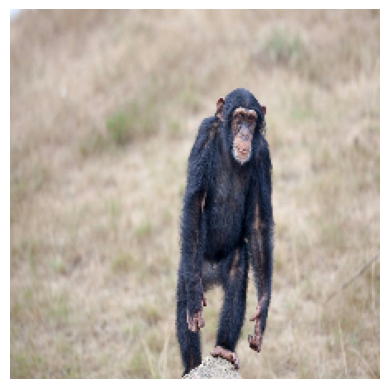

In [ ]:
# Path to the image we want to predict
img_path = '/content/drive/MyDrive/Shortcut to courses materials/practical_computer_vision/monkey.jpg'  # Replace with the path to your image
img_array = load_and_preprocess_image(img_path)

# Make a prediction
predictions = model.predict(img_array)

# Decode the predictions
decoded_predictions = decode_predictions(predictions, top=1)[0]

# Print the predictions
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Display the image
def display_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

display_image(img_path)

In [ ]:
#@title occlusion function
def sliding_square_occlusion(image, occlusion_size, step_size):
    """
    Add a sliding square occlusion to the input image.

    Args:
    - image: Input image (numpy array).
    - occlusion_size: Size of the square occlusion (side length).
    - step_size: Step size for sliding the occlusion.

    Returns:
    - List of images with the added occlusion.
    """
    h, w, _ = image[0].shape
    occluded_images = []

    # Slide the occlusion window across the image
    for y in range(0, h - occlusion_size + 1, step_size):
        for x in range(0, w - occlusion_size + 1, step_size):
            occluded_image = image[0].copy()
            occluded_image[y:y + occlusion_size, x:x + occlusion_size] = 0
            occluded_images.append(occluded_image)

    return occluded_images

total number of occluded images: 1225



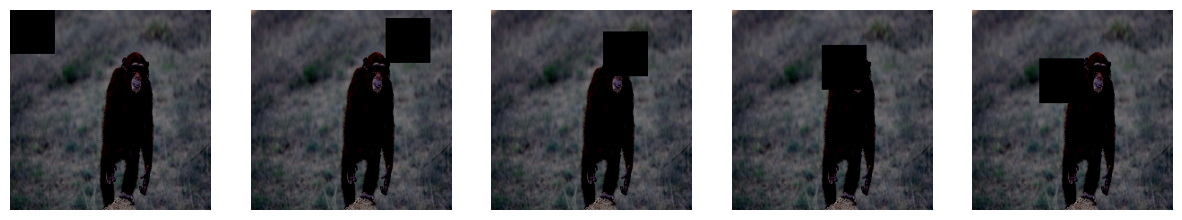

In [ ]:
#@title visualize some occluded versions of the image
occluded_images = sliding_square_occlusion(image=img_array, occlusion_size=50, step_size=5)
print('total number of occluded images:', len(occluded_images))

print('')

fig, axes = plt.subplots(1,5, figsize=(15, 7))
for ax, occluded_image in zip(axes, occluded_images[:1000:100]):
    ax.imshow(occluded_image.astype(float) / 255.0)
    ax.axis('off')
    #plt.suptitle('The black square box represents the occluded position of the image')
plt.show()

In [ ]:
#@title Saliency map 1 : occlusion size=10 ,  step (stride )=10
import seaborn as sns
#,
def saliency_map(image,model,batch_size=512,occlusion_size=10,step_size=10):
  """
    display a heatmap representing the saliency map of the image

    Args:
    - batch_size : process images as batch to avoid memory issues
    - image (list): original image
    - model : underlying model
    Return: figure , probability a each occluded location
  """
  # Make a prediction
  predictions = model.predict(image)

  encoded_label=np.argmax(predictions,axis=1)[0]
# Decode the predictions
  _,label,score= decode_predictions(predictions, top=1)[0][0]

  # list of occluded images
  occluded_images = sliding_square_occlusion(image,occlusion_size,step_size)

  # prepare occluded images for predictions
  n=len(occluded_images )
  pred=[]
  for i in range(0, n, batch_size):
        batch_images = occluded_images[i:i + batch_size]
        batch_images_array = np.array(batch_images)
        batch_predictions = model.predict(batch_images_array, verbose=0)[:,encoded_label]
        pred.append(batch_predictions)

  list_proba=np.concatenate(pred, axis=0)
  #occlusions=np.array(sliding_square_occlusion(image,occlusion_size,step_size))

  # output predictions of occluded images ( probabilities )
 # pred=model.predict(occlusions)

  # get the probabilities associate to the correct  class for each occluded image
#  list_proba=pred[:,encoded_label]

  # create the matrix where each value is the probability of the correct class at each occluded square’s location
  m=int(np.sqrt(len( occluded_images)))
  matrix_prob=list_proba.reshape(m,-1)

  sorted_indices= sorted(range(len(list_proba)), key=lambda i: list_proba[i], reverse=True)
  h_index=sorted_indices[:5]
  l_index=sorted_indices[-5:]

  # Resulting "saliency map" of the image

  fig=plt.figure(figsize=(10, 40))
  fig.add_subplot(12, 2, 1)
  sns.heatmap(matrix_prob, annot=False, cmap='coolwarm')
  plt.axis('off')
  # Add title and labels
  plt.title("saliency map")
  plt.xlabel("Column Index")
  plt.ylabel("Row Index")
  fig.add_subplot(12, 2, 2)
  plt.imshow(image[0])
  plt.axis('off')
  plt.title('original image: {}, score={:.2f}'.format(label,score))

  for k in range(5):
    fig.add_subplot(12, 2, 2*k+3)
    plt.imshow( occluded_images[l_index[k]])
    plt.axis('off')
    plt.title('{} occlusion with the lowest proba '.format(k+1) )

    fig.add_subplot(12, 2, 2*k+4)
    plt.imshow( occluded_images[h_index[k]])
    plt.axis('off')
    plt.title('{} occlusion with the highest proba '.format(k+1) )

  return fig,list_proba,n


1/1 [==============================] - 0s 196ms/step


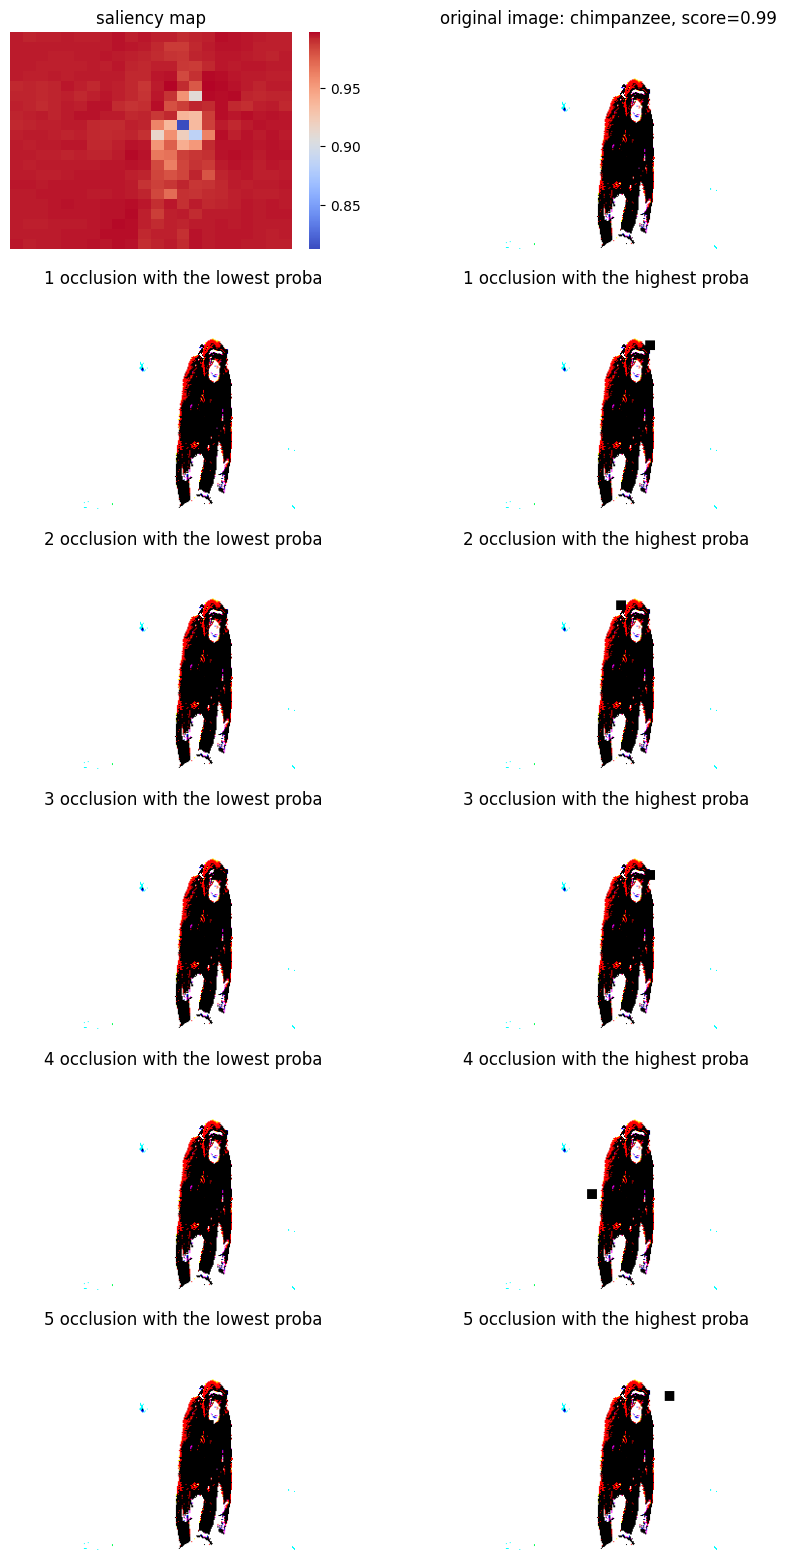

In [ ]:
fig,prob,n=saliency_map(image=img_array,model=model)
plt.show()

1/1 [==============================] - 0s 360ms/step


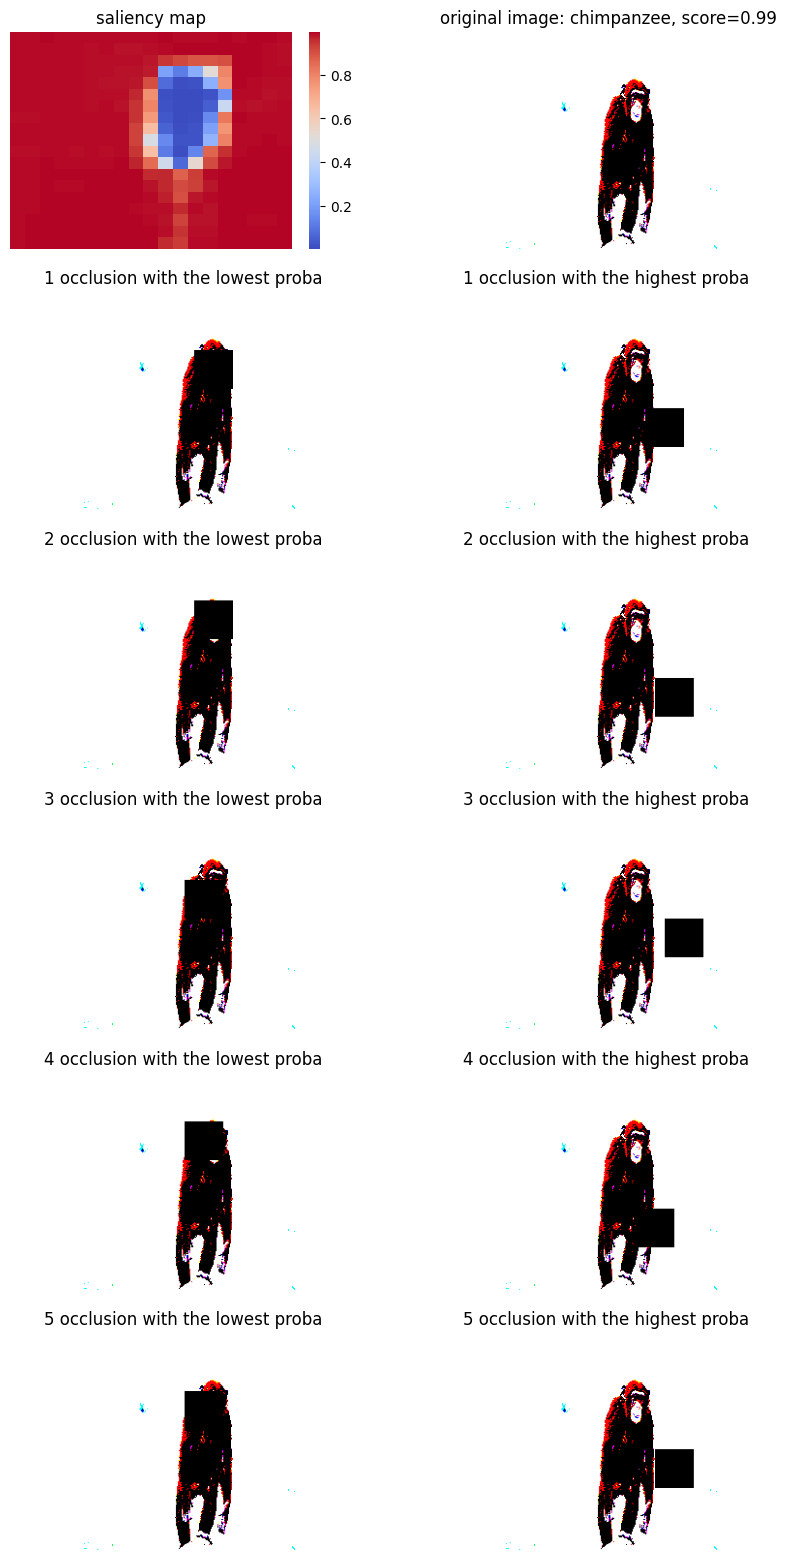

In [ ]:
#@title Saliency map 2: occlusion size=40 , stride=10
fig,prob,n=saliency_map(image=img_array,model=model,batch_size=128,occlusion_size=40,step_size=10)
plt.show()


1/1 [==============================] - 1s 519ms/step


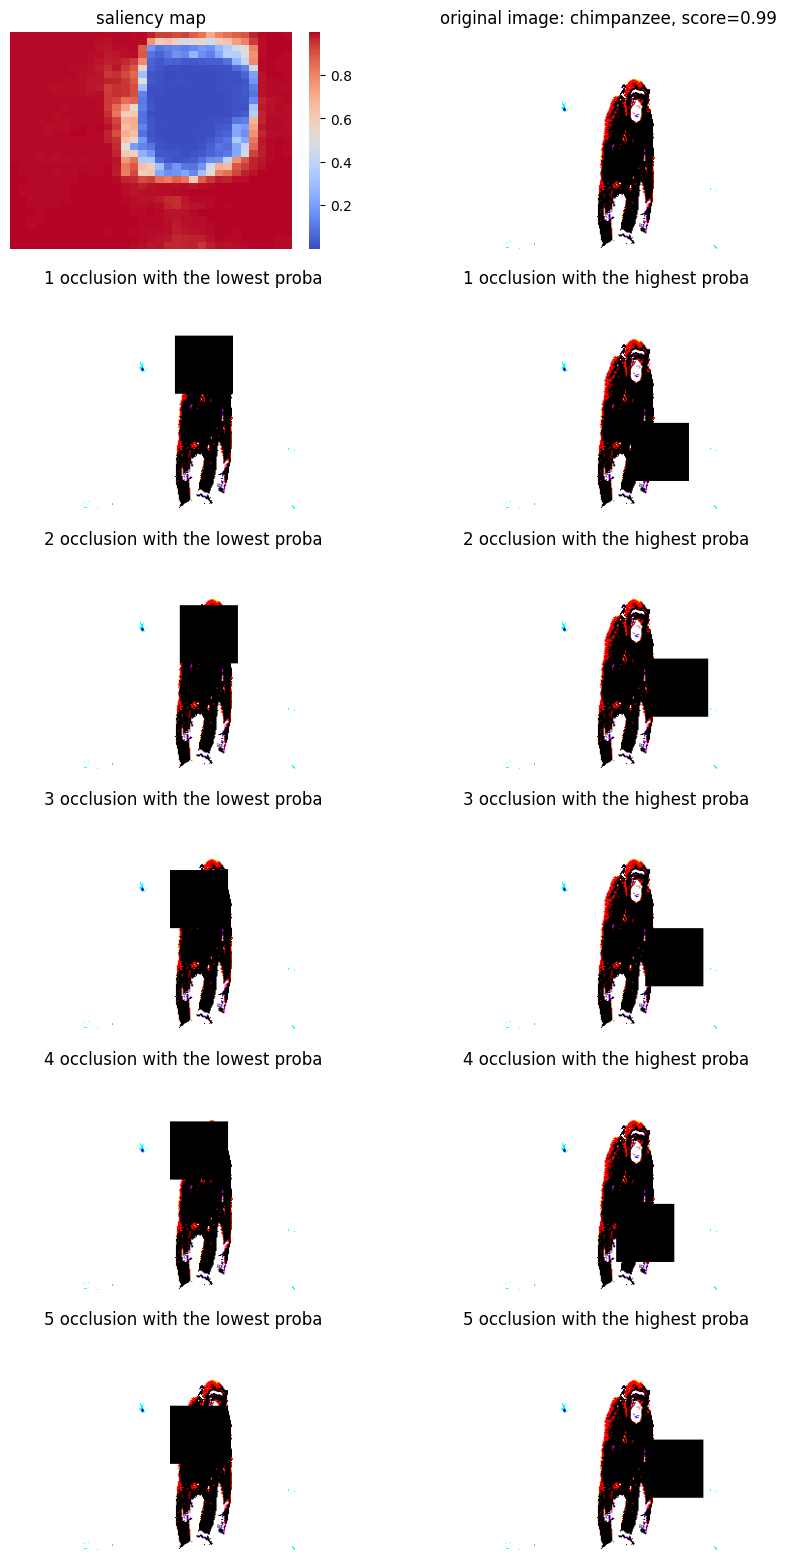

In [ ]:
#@title Saliency map 3:occlusion size=60, stride=5

fig,prob,n=saliency_map(image=img_array,model=model,batch_size=128,occlusion_size=60,step_size=5)
plt.show()